# Load Papers

In [40]:
import pandas as pd

## Load json file into panda database

In [41]:
file_path = "../json/model_stealing_papers.json"
df = pd.read_json(file_path)
df.head(3)

,date,title,author,link,abstract
0,2024-10-01,Stealing User Prompts from Mixture of Experts,"Itay Yona, Ilia Shumailov, Jamie Hayes, and Ni...",http://arxiv.org/abs/2410.22884v1,Mixture-of-Experts (MoE) models improve the ef...
1,2024-10-01,Remote Timing Attacks on Efficient Language Mo...,"Nicholas Carlini, and Milad Nasr",http://arxiv.org/abs/2410.17175v1,Scaling up language models has significantly i...
2,2024-10-01,Persistent Pre-Training Poisoning of LLMs,"Yiming Zhang, Javier Rando, Ivan Evtimov, Jian...",http://arxiv.org/abs/2410.13722v1,Large language models are pre-trained on uncur...


## Print abstract from the first paper

In [42]:
print(df['abstract'][0])

Mixture-of-Experts (MoE) models improve the efficiency and scalability of
dense language models by routing each token to a small number of experts in
each layer. In this paper, we show how an adversary that can arrange for their
queries to appear in the same batch of examples as a victim's queries can
exploit Expert-Choice-Routing to fully disclose a victim's prompt. We
successfully demonstrate the effectiveness of this attack on a two-layer
Mixtral model, exploiting the tie-handling behavior of the torch.topk CUDA
implementation. Our results show that we can extract the entire prompt using
$O({VM}^2)$ queries (with vocabulary size $V$ and prompt length $M$) or 100
queries on average per token in the setting we consider. This is the first
attack to exploit architectural flaws for the purpose of extracting user
prompts, introducing a new class of LLM vulnerabilities.


## Plot the number of papers per year

<Axes: xlabel='date'>

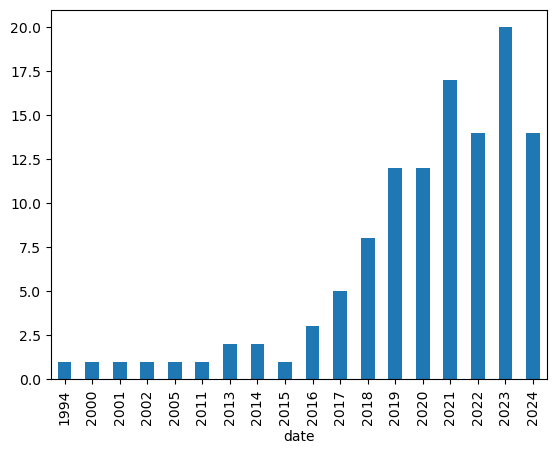

In [43]:
df['date'].groupby(df['date'].dt.year).count().plot(kind="bar")

## Print the first 20-th most frequent first-authors

In [44]:
df["first_author"] = df['author'].apply(lambda x: x.split(',')[0].strip())
qd_authors = df.groupby(df["first_author"])["first_author"].count().sort_values(ascending=False)
qd_authors.head(20)

first_author
Nicholas Carlini                 32
Enrico Carlini                    5
Sanghyun Hong                     3
David Berthelot                   3
Milad Nasr                        3
Florian Tramèr                    3
Matthew Jagielski                 3
Yiming Zhang                      3
Chawin Sitawarin                  2
Florian Tramer                    2
The DarkSide-50 Collaboration     2
Daphne Ippolito                   2
Anish Athalye                     2
Edoardo Debenedetti               2
Nicolas Papernot                  1
Oliver Bryniarski                 1
Nikhil Kandpal                    1
Warren He                         1
QWeak Collaboration               1
Nic Ford                          1
Name: first_author, dtype: int64

## Bibliography

- Tim Head: https://betatim.github.io/posts/analysing-the-arxiv/
- Lukas Schwab: https://github.com/lukasschwab/arxiv.py
- ArXiV API user manual: https://arxiv.org/help/api/user-manual       

## Related Code

- https://colab.research.google.com/github/EPS-Libraries-Berkeley/volt/blob/main/Search/arxiv_api.ipynb#scrollTo=AOqwpdUcT4DY